<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Preprocessing of Data for potato usage</h1>
<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">LEIA vs. Humans - Masterthesis</h4>
</div>
<br>

In [3]:
import pandas as pd
import re
import json
import emoji
from tqdm import tqdm
from transformers import pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tkinter as tk

from collections import defaultdict
from itertools import cycle

# Load Vent Data


In [248]:
# vent_temp = pd.read_csv('../Data/test_temporal_split.tsv', sep="\t")
vent_class = {0: "Sadness", 1: "Affection", 2: "Fear", 3: "Happiness", 4: "Anger"}

# vent_temp['sentiment'] = vent_temp['label'].map(vent_class)

# vent_user = pd.read_csv('../Data/test_user_split.tsv', sep="\t")
# vent_user['sentiment'] = vent_user['label'].map(vent_class)

vent_random = pd.read_csv('../Data/test_random_split.tsv', sep="\t")
vent_random['sentiment'] = vent_random['label'].map(vent_class)


In [250]:
emotions = list(vent_random['sentiment'].unique())
emotions


['Anger', 'Sadness', 'Fear', 'Happiness', 'Affection']

In [343]:
# Prolific Attention Screening

test_questions = {'text': 'Today is my birthday, I am so happy!! Big Party TONIGHT!!!', 'sentiment' : 'Happiness', 'id': '0_testing'}, {'text': 'My best friend moved to another state, I am a bit lonely without her. I was so sad to see her leave.', 'sentiment':'Sadness', 'id':'1_testing'}
test_questions_df = pd.DataFrame(test_questions)
test_questions_df.to_csv('test_questions.csv')



In [344]:
test_questions_df['Leia_Label'] = ['Happiness', 'Sadness']
vent = pd.read_csv('safe_final_sample.csv', index_col = 0)

In [368]:


def create_potato_data_labeled(data, current_project: str, name: str):
    """ Generates data labeled with LEIA's classification in the format needed for POTATO and saves it in the corresponding project environment


    Args:
        data (dataframe): sample of vent texts for experiment
        current_project (str): project folder
        name (str): file_name 

    Returns:
        result (dataframe): dataframe in the format needed for POTATO
    """
    data = data.copy().reset_index()
    normal_data = data.copy().reset_index()


    data.rename(columns={'text': 'og_text'}, inplace=True)

    for i in range(len(data)):
        # Get original text
        text = str(data.at[i, 'og_text'])
        words = text.split()

        # Insert <br><br> after every 12th word (improves optical display in potato)
        formatted_words = []
        for j, word in enumerate(words, start=1):
            formatted_words.append(word)
            if j % 12 == 0:
                formatted_words.append("<br>")

        formatted_text = ' '.join(formatted_words)

        # Create addition of LEIA's classification
        appendix = f"<br> <hr size='2'> LEIA classified this text as: <strong>{data.at[i, 'Leia_Label']}</strong>"

        normal_data.at[i, 'text'] = formatted_text
        data.at[i, 'og_text'] = formatted_text

        data.at[i, 'text'] = formatted_text + appendix

    for i in range(len(data)):
            if normal_data.at[i, 'id'].startswith('item'):
                normal_data.at[i, 'id'] = f'item_{i+1001}'  
    result = pd.concat([data, normal_data]).drop(columns = ['index'])    

        

    #result.to_csv(f'../surveyenv/{current_project}/data/{name}.csv', index = False)


    return result


#create_potato_data_labeled(vent, 'experiment2_w_leia', 'test1')






In [348]:
test_questions_df
test_questions_df.rename(columns={'text': 'og_text'}, inplace=True)


for i in range(len(test_questions_df)):

    text = str(test_questions_df.at[i, 'og_text'])
    words = text.split()

    # Insert <br><br> after every 12th word
    formatted_words = []
    for j, word in enumerate(words, start=1):
        formatted_words.append(word)
        if j % 12 == 0:
            formatted_words.append("<br>")

    formatted_text = ' '.join(formatted_words)

    test_questions_df.at[i, 'text'] = formatted_text

In [366]:
def create_potato_data(data, current_project:str , name:str ):
    """ Simple function to turn dataframe into format needed for POTATO

    Args:
        data (dataframe): vent sample texts
        current_project (str): folder of current experiment
        name (str): file name

    Returns:
        dataframe: dataframe in the needed format
    """
    data = data.copy().reset_index()  
    
    for i in range(len(data)):
        data.at[i, 'id'] = f'item_{i+1}'  

    
    data = pd.concat([data, test_questions_df])
    
    return data

In [388]:
stratified = create_potato_data_labeled(vent, '', '')
stratified


,og_text,sentiment,Leia_Label,id,text,level_0
0,I'd fight for a damn plant.It's the closest th...,Anger,Sadness,item_1,I'd fight for a damn plant.It's the closest th...,NaN
1,Apparently when your sister gets married her h...,Anger,Anger,item_2,Apparently when your sister gets married her h...,NaN
2,WHY DO PEOPLE CHEAT IN FORTNITE LIKE FR THO,Anger,Anger,item_3,WHY DO PEOPLE CHEAT IN FORTNITE LIKE FR THO<br...,NaN
3,why does he only talk to me when he needs to v...,Anger,Sadness,item_4,why does he only talk to me when he needs to v...,NaN
4,Woke up with a massive headache 😫,Anger,Anger,item_5,Woke up with a massive headache 😫<br> <hr size...,NaN
...,...,...,...,...,...,...
997,NaN,Sadness,Fear,item_1998,"So I like an old crush again, she used to like...",997.0
998,NaN,Sadness,Sadness,item_1999,Tbh I need friends.. 😂please hug me to be my f...,998.0
999,NaN,Sadness,Sadness,item_2000,I miss my boyfriend and we were gonna hangout ...,999.0
1000,NaN,Happiness,Happiness,0_testing,"Today is my birthday, I am so happy!! Big Part...",1000.0


In [380]:


def create_stratified_batches(data, batch_size):

    """stratify batches by emotion
    
    Args:
        data (dataframe): vent sample texts
        batch_size (int): sample size participants should receive

    Returns:
        dataframe : dataframe ordered per participant sample, containing stratified samples.
    """

    data = data[~data['id'].str.contains('_testing')].copy()

    emotions = sorted(data['sentiment'].unique())
    n_emotions = len(emotions)

    # Compute how many samples per emotion per batch
    base_per_emotion = batch_size // n_emotions
    leftovers = batch_size % n_emotions

    # Create per-emotion groups and shuffle them
    groups = {emotion: df.sample(frac=1).reset_index(drop=True)
              for emotion, df in data.groupby('sentiment')}

    leftover_emotions = list(emotions[:leftovers])
    leftover_cycle = cycle(leftover_emotions)

    batches = []

    while True:
        batch_parts = []
        enough_data = True

        # Assign base_per_emotion from each emotion
        for emotion in emotions:
            if len(groups[emotion]) < base_per_emotion:
                enough_data = False
                break
            batch_parts.append(groups[emotion].iloc[:base_per_emotion])
            groups[emotion] = groups[emotion].iloc[base_per_emotion:]

        if not enough_data:
            break

        # Assign leftover samples (evenly across batches)
        for _ in range(leftovers):
            extra_emotion = next(leftover_cycle)
            if len(groups[extra_emotion]) < 1:
                enough_data = False
                break
            batch_parts.append(groups[extra_emotion].iloc[:1])
            groups[extra_emotion] = groups[extra_emotion].iloc[1:]

        if not enough_data:
            break

        # Shuffle within batch and add to final list
        batch_df = pd.concat(batch_parts).sample(frac=1).reset_index(drop=True)
        batches.append(batch_df)

    # Combine all batches into one DataFrame
    final_df = pd.concat(batches).reset_index(drop=True)
    return final_df


In [384]:
final_stratified_sample = pd.DataFrame()

# 5 annotations per text, 40 text per person
for i in range(5):
    stratified = create_stratified_batches(vent, batch_size=40)
    final_stratified_sample = pd.concat([final_stratified_sample, stratified], ignore_index=True)


In [385]:
final_stratified_sample

,text,sentiment,Leia_Label,id
0,I just love being ignored 😍😍,Anger,Anger,item_187
1,I hate being awkward and fucking up conversati...,Sadness,Anger,item_916
2,I'm so happy my drum set finally got here I've...,Happiness,Happiness,item_711
3,"Why do you care so much about me, when I don't...",Fear,Sadness,item_389
4,Coldplay concert tickets are all sold out in 2...,Anger,Anger,item_97
...,...,...,...,...
4995,This is really grating now,Anger,Anger,item_55
4996,Decided to treat myself today and went to targ...,Happiness,Happiness,item_616
4997,"That stupid moment when you feel empty inside,...",Anger,Sadness,item_211
4998,I wish I wasn’t so afraid to talk to people. I...,Fear,Sadness,item_317


In [386]:

# check if stratification worked

def check_emotion_distribution(df, batch_size):
    num_batches = len(df) // batch_size
    for i in range(num_batches):
        batch = df.iloc[i*batch_size:(i+1)*batch_size]
        counts = batch['sentiment'].value_counts()
        print(f"Batch {i+1} emotion counts:")
        print(counts)
        print('-' * 30)

        
check_emotion_distribution(final_stratified_sample, batch_size=40)


Batch 1 emotion counts:
sentiment
Anger        10
Sadness      10
Happiness    10
Fear         10
Name: count, dtype: int64
------------------------------
Batch 2 emotion counts:
sentiment
Fear         10
Happiness    10
Anger        10
Sadness      10
Name: count, dtype: int64
------------------------------
Batch 3 emotion counts:
sentiment
Fear         10
Anger        10
Sadness      10
Happiness    10
Name: count, dtype: int64
------------------------------
Batch 4 emotion counts:
sentiment
Anger        10
Fear         10
Sadness      10
Happiness    10
Name: count, dtype: int64
------------------------------
Batch 5 emotion counts:
sentiment
Fear         10
Happiness    10
Sadness      10
Anger        10
Name: count, dtype: int64
------------------------------
Batch 6 emotion counts:
sentiment
Anger        10
Fear         10
Happiness    10
Sadness      10
Name: count, dtype: int64
------------------------------
Batch 7 emotion counts:
sentiment
Sadness      10
Anger        10
Fear

In [374]:


def create_dual_stratified_batches(data, batch_size):
    """Stratify sample by emotion and type of text (with or without LEIA)

    Args:
        data (dataframe): sample already startified per emotion
        batch_size (int): final sample size per participant

    Returns:
        dataframe: fully stratified sample of both cases in participant sample size. 
    """
    
    # Filter out test rows
    data = data[~data['id'].str.contains('_testing')].copy()

    # Add 'text_type' column (to keep track of stratification)
    data['text_type'] = np.where(data['og_text'].isnull(), 'orig', 'leia')
    data['strat_key'] = data['sentiment'] + '_' + data['text_type']

    # Get unique stratification keys
    strat_keys = sorted(data['strat_key'].unique())
    n_strat_keys = len(strat_keys)
    per_group = batch_size // n_strat_keys 

    # Shuffle 
    groups = {key: df.sample(frac=1).reset_index(drop=True)
              for key, df in data.groupby('strat_key')}

    batches = []
    exhausted = False

    while not exhausted:
        batch_parts = []
        for key in strat_keys:
            group = groups[key]
            if len(group) < per_group:
                exhausted = True
                break
            batch_parts.append(group.iloc[:per_group])
            groups[key] = group.iloc[per_group:]
        
        if not exhausted:
            batch_df = pd.concat(batch_parts).sample(frac=1).reset_index(drop=True)
            batches.append(batch_df)

    # Combine all batches
    final_df = pd.concat(batches).reset_index(drop=True)
    return final_df

batched_df = create_dual_stratified_batches(stratified, batch_size=40)



In [389]:
final_stratified_sample = pd.DataFrame()

for i in range(5):
    stratified = create_dual_stratified_batches(stratified, batch_size=40)
    final_stratified_sample = pd.concat([final_stratified_sample, stratified], ignore_index=True)
final_stratified_sample

,og_text,sentiment,Leia_Label,id,text,level_0,text_type,strat_key
0,NaN,Anger,Anger,item_1012,"Actually got dressed, went to the shpps and th...",11.0,orig,Anger_orig
1,i hate myself so much and i hate myself for fe...,Fear,Sadness,item_454,i hate myself so much and i hate myself for fe...,NaN,leia,Fear_leia
2,NaN,Anger,Anger,item_1209,"what the fuck happened to ""good morning baby""?",208.0,orig,Anger_orig
3,Good to know that always treating me like shit...,Anger,Anger,item_126,Good to know that always treating me like shit...,NaN,leia,Anger_leia
4,It was so nice catching up with my best friend...,Happiness,Happiness,item_622,It was so nice catching up with my best friend...,NaN,leia,Happiness_leia
...,...,...,...,...,...,...,...,...
9995,NaN,Anger,Anger,item_1055,This is really grating now,54.0,orig,Anger_orig
9996,NaN,Anger,Anger,item_1224,No....no! I don’t like it when strangers stand...,223.0,orig,Anger_orig
9997,I'm kind of afraid he thinks I'm smothering hi...,Fear,Fear,item_371,I'm kind of afraid he thinks I'm smothering hi...,NaN,leia,Fear_leia
9998,NaN,Anger,Anger,item_1165,When teachers tell you to be involved with sch...,164.0,orig,Anger_orig


In [392]:
test = create_potato_data(final_stratified_sample, 'experiment2_w_leia_v2', 'w_leia')
test

,index,og_text,sentiment,Leia_Label,id,text,level_0,text_type,strat_key
0,0.0,NaN,Anger,Anger,item_1,"Actually got dressed, went to the shpps and th...",11.0,orig,Anger_orig
1,1.0,i hate myself so much and i hate myself for fe...,Fear,Sadness,item_2,i hate myself so much and i hate myself for fe...,NaN,leia,Fear_leia
2,2.0,NaN,Anger,Anger,item_3,"what the fuck happened to ""good morning baby""?",208.0,orig,Anger_orig
3,3.0,Good to know that always treating me like shit...,Anger,Anger,item_4,Good to know that always treating me like shit...,NaN,leia,Anger_leia
4,4.0,It was so nice catching up with my best friend...,Happiness,Happiness,item_5,It was so nice catching up with my best friend...,NaN,leia,Happiness_leia
...,...,...,...,...,...,...,...,...,...
9997,9997.0,I'm kind of afraid he thinks I'm smothering hi...,Fear,Fear,item_9998,I'm kind of afraid he thinks I'm smothering hi...,NaN,leia,Fear_leia
9998,9998.0,NaN,Anger,Anger,item_9999,When teachers tell you to be involved with sch...,164.0,orig,Anger_orig
9999,9999.0,NaN,Sadness,Sadness,item_10000,"I love him so much. I wish he was here, but I ...",859.0,orig,Sadness_orig
0,NaN,"Today is my birthday, I am so happy!! Big Part...",Happiness,Happiness,0_testing,"Today is my birthday, I am so happy!! Big Part...",NaN,NaN,NaN


In [393]:
def check_strat_key_distribution(df, batch_size):
    """
    Prints the distribution of 'strat_key' per batch.

    Parameters:
        df (pd.DataFrame): DataFrame with a 'strat_key' column.
        batch_size (int): Size of each batch to check.
    """
    num_batches = len(df) // batch_size
    for i in range(num_batches):
        batch = df.iloc[i * batch_size : (i + 1) * batch_size]
        counts = batch['strat_key'].value_counts()
        print(f"Batch {i+1} strat_key counts:")
        print(counts)
        print('-' * 40)

check_strat_key_distribution(final_stratified_sample, batch_size=40)


Batch 1 strat_key counts:
strat_key
Anger_orig        5
Fear_leia         5
Anger_leia        5
Happiness_leia    5
Sadness_orig      5
Sadness_leia      5
Happiness_orig    5
Fear_orig         5
Name: count, dtype: int64
----------------------------------------
Batch 2 strat_key counts:
strat_key
Sadness_orig      5
Sadness_leia      5
Anger_orig        5
Happiness_leia    5
Anger_leia        5
Fear_leia         5
Fear_orig         5
Happiness_orig    5
Name: count, dtype: int64
----------------------------------------
Batch 3 strat_key counts:
strat_key
Happiness_orig    5
Sadness_leia      5
Fear_orig         5
Sadness_orig      5
Anger_orig        5
Happiness_leia    5
Fear_leia         5
Anger_leia        5
Name: count, dtype: int64
----------------------------------------
Batch 4 strat_key counts:
strat_key
Fear_leia         5
Sadness_orig      5
Anger_leia        5
Happiness_orig    5
Fear_orig         5
Anger_orig        5
Happiness_leia    5
Sadness_leia      5
Name: count, dt

In [219]:
def check_text_type_distribution(df, batch_size):
    num_batches = len(df) // batch_size
    for i in range(num_batches):
        batch = df.iloc[i*batch_size:(i+1)*batch_size]
        counts = batch['text_type'].value_counts()
        
        print(f"Batch {i+1} text type counts:")
        print(counts)
        print('-' * 30)


In [394]:
check_text_type_distribution(final_stratified_sample, batch_size=40)


Batch 1 text type counts:
text_type
orig    20
leia    20
Name: count, dtype: int64
------------------------------
Batch 2 text type counts:
text_type
orig    20
leia    20
Name: count, dtype: int64
------------------------------
Batch 3 text type counts:
text_type
orig    20
leia    20
Name: count, dtype: int64
------------------------------
Batch 4 text type counts:
text_type
leia    20
orig    20
Name: count, dtype: int64
------------------------------
Batch 5 text type counts:
text_type
orig    20
leia    20
Name: count, dtype: int64
------------------------------
Batch 6 text type counts:
text_type
orig    20
leia    20
Name: count, dtype: int64
------------------------------
Batch 7 text type counts:
text_type
leia    20
orig    20
Name: count, dtype: int64
------------------------------
Batch 8 text type counts:
text_type
leia    20
orig    20
Name: count, dtype: int64
------------------------------
Batch 9 text type counts:
text_type
orig    20
leia    20
Name: count, dtype: in

In [377]:
check_emotion_distribution(batched_df, batch_size=40)


Batch 1 emotion counts:
sentiment
Anger        10
Sadness      10
Fear         10
Happiness    10
Name: count, dtype: int64
------------------------------
Batch 2 emotion counts:
sentiment
Sadness      10
Anger        10
Fear         10
Happiness    10
Name: count, dtype: int64
------------------------------
Batch 3 emotion counts:
sentiment
Happiness    10
Fear         10
Sadness      10
Anger        10
Name: count, dtype: int64
------------------------------
Batch 4 emotion counts:
sentiment
Anger        10
Sadness      10
Happiness    10
Fear         10
Name: count, dtype: int64
------------------------------
Batch 5 emotion counts:
sentiment
Happiness    10
Anger        10
Sadness      10
Fear         10
Name: count, dtype: int64
------------------------------
Batch 6 emotion counts:
sentiment
Sadness      10
Happiness    10
Anger        10
Fear         10
Name: count, dtype: int64
------------------------------
Batch 7 emotion counts:
sentiment
Anger        10
Happiness    10
Fear

# Check length in vent random data set, see where I can cut some of the texts out due to length

In [7]:
# testing 2 approaches

vent_random['word_count_prepr'] = vent_random['text'].apply(
    lambda x: len(re.findall(r'\b\w+\b', x.lower()))
)


vent_random['Word_Count'] = vent_random['text'].apply(lambda x: len(x.split()))


In [8]:

mean_length = vent_random['word_count_prepr'].mean() 
std_dev = vent_random['word_count_prepr'].std()  
quartiles = np.percentile(vent_random['word_count_prepr'], [25, 50, 75])

print(f"Mean Text Length: {mean_length:.2f} words")
print(f"Standard Deviation: {std_dev:.2f} words")
print(f"Quartiles (25th, 50th, 75th percentiles): {quartiles}")

Mean Text Length: 30.42 words
Standard Deviation: 49.75 words
Quartiles (25th, 50th, 75th percentiles): [10. 18. 33.]


In [9]:

mean_length = vent_random['Word_Count'].mean() 
std_dev = vent_random['Word_Count'].std()  
quartiles = np.percentile(vent_random['Word_Count'], [25, 50, 75])

print(f"Mean Text Length: {mean_length:.2f} words")
print(f"Standard Deviation: {std_dev:.2f} words")
print(f"Quartiles (25th, 50th, 75th percentiles): {quartiles}")
print(f"Max length of words: {vent_random['Word_Count'].max()}")
print(f"Min length of words: {vent_random['Word_Count'].min()}")

Mean Text Length: 29.24 words
Standard Deviation: 47.91 words
Quartiles (25th, 50th, 75th percentiles): [10. 18. 32.]
Max length of words: 8799
Min length of words: 3


75% of texts are less than 32 words. --> cut at 40 legitimate

In [12]:
vent_random_len_cut = vent_random[vent_random['Word_Count']<=40]

mean_length = vent_random_len_cut['Word_Count'].mean() 
std_dev = vent_random_len_cut['Word_Count'].std()  
quartiles = np.percentile(vent_random_len_cut['Word_Count'], [25, 50, 75])

print(f"Mean Text Length: {mean_length:.2f} words")
print(f"Standard Deviation: {std_dev:.2f} words")
print(f"Quartiles (25th, 50th, 75th percentiles): {quartiles}")
print(f"Max length of words: {vent_random_len_cut['Word_Count'].max()}")
print(f"Min length of words: {vent_random_len_cut['Word_Count'].min()}")

Mean Text Length: 16.65 words
Standard Deviation: 9.39 words
Quartiles (25th, 50th, 75th percentiles): [ 9. 15. 23.]
Max length of words: 40
Min length of words: 3


In [13]:
print(len(vent_random))
print(len(vent_random_len_cut))
len(vent_random)-len(vent_random_len_cut)

967201
796234


170967

In [211]:
cut_leia_wo_affection = pd.read_csv('cut_vent_leia_wo_affection.csv').drop(columns=['Unnamed: 0'])
cut_leia_wo_affection

,text,label,sentiment,word_count_prepr,Word_Count,Leia_Label
0,Don't You Hate When People Are Watching You Te...,4,Anger,10,10,Anger
1,Things are shit,0,Sadness,3,3,Sadness
2,I forgot that I got a math test tomorrow. Damn it,4,Anger,11,11,Fear
3,I stubbed my toe this morning and now there is...,2,Fear,21,21,Fear
4,First day of school tomorrow . 😅,2,Fear,5,7,Fear
...,...,...,...,...,...,...
665390,Have you ever spent the day with someone and i...,0,Sadness,44,40,Sadness
665391,i've had a good heart for all the wrong people,4,Anger,11,10,Sadness
665392,I'm prepared to completely lose myself over th...,2,Fear,31,29,Fear
665393,i qm the mmost annoyinng unneeded ppersonon tt...,0,Sadness,9,9,Sadness


In [173]:
# remove affection from data sets
 
vent_wo_affection = vent_random_len_cut[vent_random_len_cut['sentiment']!= 'Affection']
vent_wo_affection
emotions = list(vent_wo_affection['sentiment'].unique())
emotions

['Anger', 'Sadness', 'Fear', 'Happiness']

In [178]:
def get_equal_sample(df, endsize: int, rand_state: int):

    sample_size_per_class = endsize // df['sentiment'].nunique()

    # Stratified sampling
    equal_sample = (
        df.groupby('sentiment', group_keys=False)
        .apply(lambda x: x.sample(sample_size_per_class, random_state=rand_state))
        .reset_index(drop=True)
    )

    return equal_sample[['text', 'sentiment', 'Leia_Label']]

vent_equal_final = get_equal_sample(cut_leia_wo_affection, 1000, 145)
vent_equal_final

C:\Users\clair\AppData\Local\Temp\ipykernel_4256\4042422226.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(sample_size_per_class, random_state=rand_state))


,text,sentiment,Leia_Label
0,"If you have a problem with what I post, unfoll...",Anger,Anger
1,♋️GOOD THEN I CAN GO TO FUCKING ROSE AND CURSE...,Anger,Anger
2,snapchat ruins friendships. social media ruins...,Anger,Anger
3,_USER_REFERENCE_ where is kin points in my pro...,Anger,Anger
4,This is so hard when I wanna smack the shit ou...,Anger,Anger
...,...,...,...
995,I really want to come out but I come from a fa...,Sadness,Fear
996,"It's like the better my best friend feels, the...",Sadness,Sadness
997,Eating Kinder Chocolate and trying not to cry ...,Sadness,Sadness
998,teach me how you can sleep at night knowing yo...,Sadness,Sadness


In [207]:
cut_leia_wo_affection_wo_final = cut_leia_wo_affection[~cut_leia_wo_affection['text'].isin(vent_equal_final['text'])].dropna()


In [237]:
vent_equal_completion = get_equal_sample(cut_leia_wo_affection_wo_final, 120, 456)


C:\Users\clair\AppData\Local\Temp\ipykernel_4256\4042422226.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(sample_size_per_class, random_state=rand_state))


In [182]:
for i in range(len(vent_equal_final)):
        vent_equal_final.at[i, 'id'] = f'item_{i+1}' 
vent_equal_final.to_csv('vent_final_wo_affection.csv')

In [238]:
for i in range(len(vent_equal_completion)):
        vent_equal_completion.at[i, 'id'] = f'item_{i+1}' 
vent_equal_completion.to_csv('vent_equal_completion.csv')

In [2]:
# checking for extrem texts in final sample

class label_text:
    """ App to check vent sample for triggering content and label as safe or unsafe. 

    Args:
        input_file (str): name of vent sample file
        output_file (str): name of labeled output file
        

    Returns:
        labeled csv file
    """


    def __init__(self, input_file_name, output_file_name, geometry='700x400',title="Labeling App"):
        self.title = title
        self.geometry = geometry
        self.input_file_name = input_file_name
        self.output_file_name=output_file_name

    def load_data(self):
        
        self.input_file = pd.read_csv(self.input_file_name)
        #self.input_file=self.input_file.sample(n=150, random_state=123)

        if os.path.exists(self.output_file_name):
            self.output_file = pd.read_csv(self.output_file_name)
        else:
            self.output_file = pd.DataFrame(columns=self.input_file.columns)
        
        self.working_file=self.input_file[~self.input_file["id"].isin(self.output_file["id"])]
    
                
    def abort(self):
        self.output_file.to_csv(self.output_file_name)
        self.window.destroy()   

    def next_text(self):

        self.get_started_button.destroy()

        self.random_row = self.working_file.sample(n=1).iloc[0]
        self.text = self.random_row['text']
        
        self.update_counter()


        self.text_label.config(text = f'Submission: {self.text}')
        self.label.config(text='Is this text safe?')
        self.working_file=self.working_file.drop(self.random_row.name)

    def update_counter(self):

        remaining = len(self.working_file)
        self.counter_label.config(text=f"Texts remaining: {remaining}")



    def start_app(self):

        self.window = tk.Tk()
        self.window.title(self.title)
        self.window.geometry(self.geometry)
        self.window.resizable(True, True)

        self.load_data()


        self.text_label = tk.Label(self.window, text = '', wraplength=700, anchor= 'center')
        self.text_label.pack(side=tk.TOP, pady=10)
        

        self.label = tk.Label(self.window, text='Press the "Get Started Button" to assign sentiments to tweets.')
        self.label.pack(side=tk.TOP, pady=10)

        self.counter_label = tk.Label(self.window, text='')
        self.counter_label.pack(side=tk.TOP, pady=5)
        self.update_counter()

        

        self.get_started_button = tk.Button(self.window, text='Get Started', command=self.labeling)
        self.get_started_button.pack()

        if len(self.working_file)==0:
            self.label.config(text="All tweets have already been labeled.\n You may close the app.")
            self.get_started_button.destroy()
        
        self.window.protocol("WM_DELETE_WINDOW",self.abort)
        self.window.mainloop()
        


    def labeling(self):

        self.get_started_button.destroy()

        
        button_frame = tk.Frame(self.window)
        button_frame.pack(side=tk.TOP, pady=10)  

        def callback(label):

            self.output_file.loc[len(self.output_file)]=self.random_row
            self.output_file.loc[len(self.output_file)-1,"label"]=label
            

            if len(self.working_file) == 0:
                self.label.config(text="All tweets have been labeled! You may close the app.")
                self.output_file.to_csv(self.output_file_name)
                safe.destroy()
                unsafe.destroy()
            else:
                self.next_text()
                self.update_counter()
        

        safe = tk.Button(button_frame, text='Safe', command=lambda: callback('Safe'))
        unsafe = tk.Button(button_frame, text='Unsafe', command=lambda: callback('Unsafe'))

        safe.pack(side=tk.LEFT, padx=5)
        unsafe.pack(side=tk.LEFT, padx=5)

        self.next_text()


In [219]:
#label_text("vent_final_wo_affection.csv", "final_sample_trigger_checked.csv").start_app()

In [239]:
# label_text("vent_equal_completion.csv", "vent_equal_completion_checked.csv").start_app()

In [195]:
checked_final = pd.read_csv('final_sample_trigger_checked.csv').drop(columns=['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Unnamed: 0.4', 'Unnamed: 0.5'])

In [31]:
checked_final['label'].value_counts()

label
Safe      956
Unsafe     44
Name: count, dtype: int64

In [33]:
checked_completion = pd.read_csv('vent_equal_completion_checked.csv', index_col=0).drop(columns=['Unnamed: 0'])
checked_final_complete = pd.concat([checked_final, checked_completion])
checked_final_complete['label'].value_counts()

label
Safe      1066
Unsafe      54
Name: count, dtype: int64

In [34]:
#checked_pilot = pd.read_csv('vent_equal_pilot_checked.csv').drop(columns=['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])
safe_final = checked_final_complete[checked_final['label']=='Safe']
safe_final['sentiment'].value_counts()
#checked_final_complete['label'].value_counts()

C:\Users\clair\AppData\Local\Temp\ipykernel_20656\3082102919.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  safe_final = checked_final_complete[checked_final['label']=='Safe']


sentiment
Happiness    277
Anger        273
Fear         265
Sadness      258
Name: count, dtype: int64

In [246]:
safe_final_sample = get_equal_sample(safe_final, 1000, 345)
safe_final_sample

C:\Users\clair\AppData\Local\Temp\ipykernel_4256\4042422226.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(sample_size_per_class, random_state=rand_state))


,text,sentiment,Leia_Label
0,I'd fight for a damn plant.It's the closest th...,Anger,Sadness
1,Apparently when your sister gets married her h...,Anger,Anger
2,WHY DO PEOPLE CHEAT IN FORTNITE LIKE FR THO,Anger,Anger
3,why does he only talk to me when he needs to v...,Anger,Sadness
4,Woke up with a massive headache 😫,Anger,Anger
...,...,...,...
995,Basically other shitty birthday...great,Sadness,Sadness
996,it's okay to not be okayit's okay to not be ok...,Sadness,Sadness
997,"So I like an old crush again, she used to like...",Sadness,Fear
998,Tbh I need friends.. 😂please hug me to be my f...,Sadness,Sadness


In [247]:
safe_final_sample['sentiment'].value_counts()

sentiment
Anger        250
Fear         250
Happiness    250
Sadness      250
Name: count, dtype: int64

In [32]:
safe_final = checked_final[checked_final['label']=='Unsafe']
safe_final['sentiment'].value_counts()

sentiment
Sadness      21
Fear         13
Anger         7
Happiness     3
Name: count, dtype: int64

## Test if LEIA performs differently depending on text length


In [53]:

def run_leia(df, model: str = "LEIA/LEIA-base", text_col: str= 'text'):

    pipe_leia = pipeline('text-classification', model=model, 
                         tokenizer=model, truncation=True, max_length=128)
    
    tqdm.pandas(desc="Processing")  
    df['Leia_Label'] = df[text_col].progress_apply(lambda x: pipe_leia(x)[0]['label'])  

    return df


In [55]:
vent_long_texts = vent_random[~vent_random.isin(vent_random_len_cut)].dropna()
vent_long_texts

,text,label,sentiment,word_count_prepr,Word_Count
4,3 girls in my class don't know how to let go o...,0.0,Sadness,70.0,69.0
5,"I've been off 4 days, started my stress tablet...",2.0,Fear,55.0,52.0
8,#nsfwMy boyfriend is amazing. Friday night whe...,1.0,Affection,266.0,256.0
14,So I wasn't gonna go to school today because w...,4.0,Anger,58.0,53.0
16,I just want to run away and not come back. Joh...,4.0,Anger,66.0,63.0
...,...,...,...,...,...
967170,This is a song I wrote tonight. Let me know wh...,0.0,Sadness,234.0,228.0
967173,Im scared cause he messaged me saying hes just...,2.0,Fear,57.0,57.0
967192,🐾 What Animal Are You NSFW tag meme! 🐾created ...,1.0,Affection,317.0,358.0
967197,_USER_REFERENCE_ IF YOU WERE A MYTHICAL CREATU...,1.0,Affection,137.0,142.0


In [70]:
cut_vent_leia = pd.read_csv('../Data/cut_vent_leia.csv')
long_word_vent_leia = pd.read_csv('../Data/long_vent_leia.csv')
cut_vent_leia

,Unnamed: 0,text,label,sentiment,word_count_prepr,Word_Count,Leia_Label
0,0,Don't You Hate When People Are Watching You Te...,4,Anger,10,10,Anger
1,1,Things are shit,0,Sadness,3,3,Sadness
2,2,I forgot that I got a math test tomorrow. Damn it,4,Anger,11,11,Fear
3,3,I stubbed my toe this morning and now there is...,2,Fear,21,21,Fear
4,6,First day of school tomorrow . 😅,2,Fear,5,7,Fear
...,...,...,...,...,...,...,...
796229,967194,Spaghetti is my new addiction,1,Affection,5,5,Affection
796230,967195,i've had a good heart for all the wrong people,4,Anger,11,10,Sadness
796231,967196,I'm prepared to completely lose myself over th...,2,Fear,31,29,Fear
796232,967199,i qm the mmost annoyinng unneeded ppersonon tt...,0,Sadness,9,9,Sadness


In [130]:
cut_vent_leia_wo_affection = pd.read_csv('../Data/cut_vent_leia_wo_affection.csv')
long_word_vent_leia_wo_affection = pd.read_csv('../Data/vent_long_texts_wo_affection.csv')
cut_vent_leia_wo_affection

,Unnamed: 0,text,label,sentiment,word_count_prepr,Word_Count,Leia_Label
0,0,Don't You Hate When People Are Watching You Te...,4,Anger,10,10,Anger
1,1,Things are shit,0,Sadness,3,3,Sadness
2,2,I forgot that I got a math test tomorrow. Damn it,4,Anger,11,11,Fear
3,3,I stubbed my toe this morning and now there is...,2,Fear,21,21,Fear
4,6,First day of school tomorrow . 😅,2,Fear,5,7,Fear
...,...,...,...,...,...,...,...
665390,967193,Have you ever spent the day with someone and i...,0,Sadness,44,40,Sadness
665391,967195,i've had a good heart for all the wrong people,4,Anger,11,10,Sadness
665392,967196,I'm prepared to completely lose myself over th...,2,Fear,31,29,Fear
665393,967199,i qm the mmost annoyinng unneeded ppersonon tt...,0,Sadness,9,9,Sadness


In [62]:
# reused own functions from SMDA, but will also use inbuilt methods

def accuracy(df, col_prediction, col_label='label'):
    return (df[col_prediction] == df[col_label]).sum() / len(df)


def precision(df, true, emotion, pred):
    true_positive = 0
    selected_elements = 0

    for true, pred in zip(df[true], df[pred]):
                if pred == emotion:
                    selected_elements += 1
                    if true == pred:
                        true_positive += 1
            
    precision = true_positive / selected_elements if selected_elements !=0 else 0
    return precision

def recall(df, true, emotion, pred):
      

    true_positive = 0
    relevant_elements = 0

    for true, pred in zip(df[true], df[pred]):
        if true == emotion:
            relevant_elements += 1
            if true == pred:
                true_positive += 1
    
    recall = true_positive / relevant_elements if relevant_elements!=0 else 0

    return recall
      


def f1_score(df, col_prediction, label, col_label='label'):
    prec = precision(df, col_prediction, label, col_label)
    rec = recall(df, col_prediction, label, col_label)
    
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) != 0 else 0  


In [80]:
cut_vent_leia

,Unnamed: 0,text,label,sentiment,word_count_prepr,Word_Count,Leia_Label
0,0,Don't You Hate When People Are Watching You Te...,4,Anger,10,10,Anger
1,1,Things are shit,0,Sadness,3,3,Sadness
2,2,I forgot that I got a math test tomorrow. Damn it,4,Anger,11,11,Fear
3,3,I stubbed my toe this morning and now there is...,2,Fear,21,21,Fear
4,6,First day of school tomorrow . 😅,2,Fear,5,7,Fear
...,...,...,...,...,...,...,...
796229,967194,Spaghetti is my new addiction,1,Affection,5,5,Affection
796230,967195,i've had a good heart for all the wrong people,4,Anger,11,10,Sadness
796231,967196,I'm prepared to completely lose myself over th...,2,Fear,31,29,Fear
796232,967199,i qm the mmost annoyinng unneeded ppersonon tt...,0,Sadness,9,9,Sadness


In [114]:
def leia_metrics(df):

    """ 
    TBW
    """
    leia_metrics = {}
    #emotions = list(df['sentiment'].unique())


    leia_acc = accuracy(df, 'sentiment', 'Leia_Label')

    for emotion in emotions:
        leia_metrics[emotion] = {
            'precision': precision(df, 'sentiment', emotion, 'Leia_Label'),
            'recall': recall(df, 'sentiment', emotion, 'Leia_Label'),
            'f1_score': f1_score(df, 'sentiment', emotion, 'Leia_Label')
        }

    leia_prec_rc_f1 = pd.DataFrame.from_dict(leia_metrics, orient='index')
    leia_macro_f1 = leia_prec_rc_f1['f1_score'].mean()

    return leia_prec_rc_f1, leia_macro_f1, leia_acc




In [115]:
cut_leia_per_emot, cut_leia_macro_f1, cut_leia_acc = leia_metrics(cut_vent_leia)
cut_leia_per_emot

,precision,recall,f1_score
Anger,0.707252,0.739861,0.723189
Sadness,0.700651,0.766393,0.732049
Fear,0.726974,0.643253,0.682556
Happiness,0.784494,0.717672,0.749597
Affection,0.747448,0.741056,0.744238


In [116]:
long_leia_per_emot, longleia_macro_f1, long_leia_acc = leia_metrics(long_word_vent_leia)
long_leia_per_emot

,precision,recall,f1_score
Anger,0.772194,0.809779,0.790540
Sadness,0.707403,0.733090,0.720018
Fear,0.737732,0.693002,0.714668
Happiness,0.752726,0.604806,0.670707
Affection,0.780247,0.801089,0.790530


In [147]:
cut_leia_macro_f1

0.7263257015279185

In [146]:
longleia_macro_f1

0.7372927297280922

In [117]:

def bootstrap_leia_metrics(small_df, large_df, n_bootstrap=1000):
    """
    Perform bootstrapping on large_df to match the size of small_df and compute F1-score distributions.
    
    Parameters:
    - small_df: The smaller dataframe.
    - large_df: The larger dataframe.
    - n_bootstrap: Number of bootstrap samples.

    Returns:
    - f1_scores_per_emotion: Dictionary of lists containing F1-scores for each emotion.
    - macro_f1_scores: List of macro F1-scores across bootstrap samples.
    """
    small_df_size = len(small_df)  # Size of the smaller dataframe
    emotions = list(large_df['sentiment'].unique())


    # Store bootstrap results
    f1_scores_per_emotion = {emotion: [] for emotion in emotions}  # Per emotion
    macro_f1_scores = []  # Overall macro F1-score

    for _ in tqdm(range(n_bootstrap)):
        # Randomly sample from large_df with replacement
        sampled_df = large_df.sample(n=small_df_size, replace=True)

        # Compute metrics
        leia_per_emot, leia_macro_f1, _ = leia_metrics(sampled_df)

        # Store results
        for emotion in emotions:
            f1_scores_per_emotion[emotion].append(leia_per_emot.loc[emotion, 'f1_score'])
        
        macro_f1_scores.append(leia_macro_f1)

    return f1_scores_per_emotion, macro_f1_scores


In [118]:
test_cut = get_equal_sample(cut_vent_leia, 100, 123)
test_long = get_equal_sample(long_word_vent_leia, 30, 123)

C:\Users\clair\AppData\Local\Temp\ipykernel_4256\42883401.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(sample_size_per_class, random_state=rand_state))
C:\Users\clair\AppData\Local\Temp\ipykernel_4256\42883401.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(sample_size_per_class, random_state=rand_state))


In [124]:
f1_scores_per_emotion, macro_f1_scores = bootstrap_leia_metrics(long_word_vent_leia, cut_vent_leia, n_bootstrap=1000)

100%|██████████| 1000/1000 [17:37<00:00,  1.06s/it]


In [145]:
mean_f1_cut = np.mean(macro_f1_scores)
mean_f1_cut

0.7262978288436489

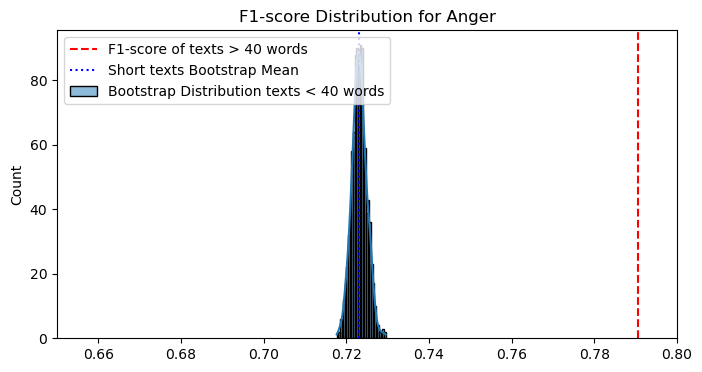

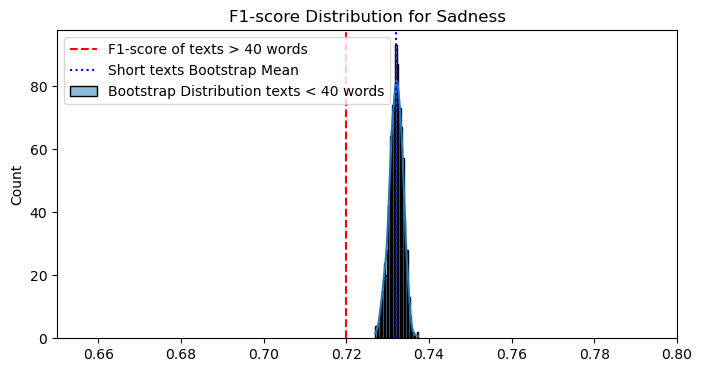

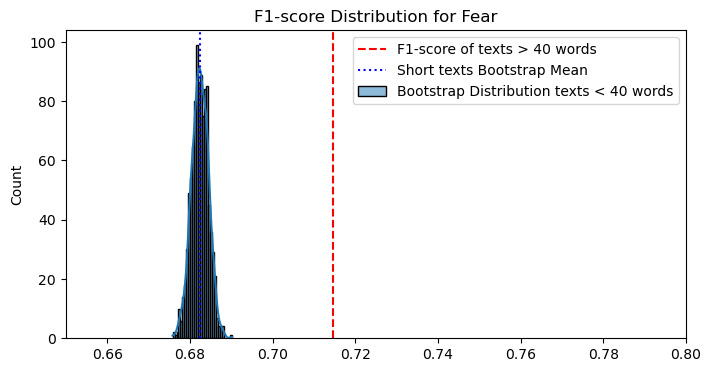

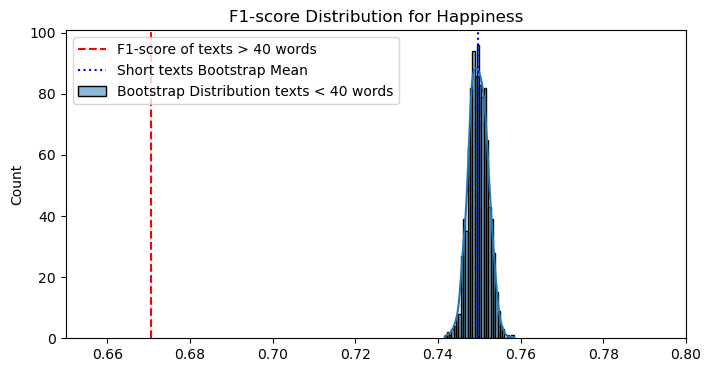

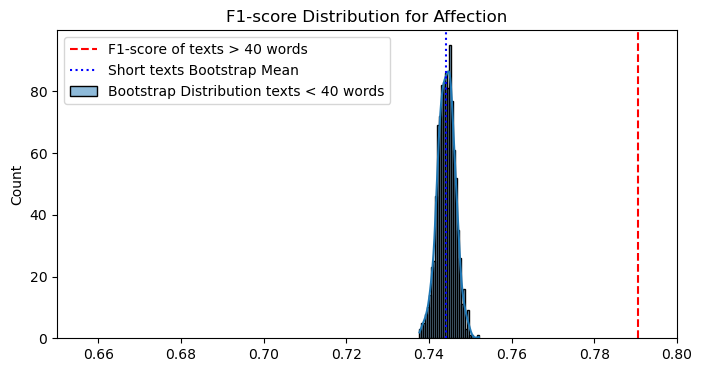

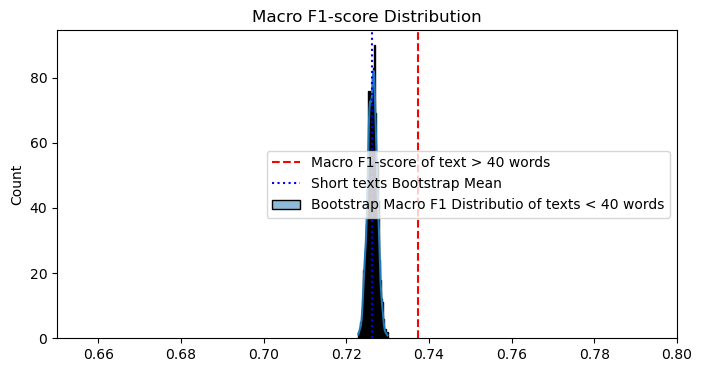

In [128]:

for emotion in emotions:
    plt.figure(figsize=(8, 4))
    sns.histplot(f1_scores_per_emotion[emotion], kde=True, bins=30, label="Bootstrap Distribution texts < 40 words")
    
    plt.axvline(long_leia_per_emot.loc[emotion, 'f1_score'], color='red', linestyle='dashed', label="F1-score of texts > 40 words")
    plt.axvline(np.mean(f1_scores_per_emotion[emotion]), color='blue', linestyle='dotted', label="Short texts Bootstrap Mean")
    plt.xlim(0.65, 0.80)  # Fix the x-axis range

    plt.title(f"F1-score Distribution for {emotion}")
    plt.legend()
    plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(macro_f1_scores, kde=True, bins=30, label="Bootstrap Macro F1 Distributio of texts < 40 words")

plt.axvline(longleia_macro_f1, color='red', linestyle='dashed', label="Macro F1-score of text > 40 words")
plt.axvline(np.mean(macro_f1_scores), color='blue', linestyle='dotted', label="Short texts Bootstrap Mean")
plt.xlim(0.65, 0.8)  # Fix the x-axis range

plt.title("Macro F1-score Distribution")
plt.legend()
plt.show()


## Without Affection!


In [148]:
emotions = list(cut_vent_leia_wo_affection['sentiment'].unique())

In [232]:
long_word_vent_leia_wo_affection

,Unnamed: 0,text,label,sentiment,word_count_prepr,Word_Count,Leia_Label
0,4,3 girls in my class don't know how to let go o...,0.0,Sadness,70.0,69.0,Anger
1,5,"I've been off 4 days, started my stress tablet...",2.0,Fear,55.0,52.0,Anger
2,14,So I wasn't gonna go to school today because w...,4.0,Anger,58.0,53.0,Anger
3,16,I just want to run away and not come back. Joh...,4.0,Anger,66.0,63.0,Sadness
4,19,why do people come to me when they need someon...,4.0,Anger,76.0,72.0,Anger
...,...,...,...,...,...,...,...
143784,967137,Im scared because while my friends talk about ...,2.0,Fear,46.0,46.0,Fear
143785,967145,I'm still mad because she KNEW we weren't goin...,4.0,Anger,45.0,41.0,Anger
143786,967156,I don't go to school for one day because I'm h...,0.0,Sadness,45.0,42.0,Anger
143787,967170,This is a song I wrote tonight. Let me know wh...,0.0,Sadness,234.0,228.0,Sadness


In [152]:
cut_leia_per_emot_wo_affection, cut_leia_macro_f1_wo_affection, cut_leia_acc_wo_affection = leia_metrics(cut_vent_leia_wo_affection)
long_leia_per_emot_wo_affection, longleia_macro_f1_wo_affection, long_leia_acc_wo_affection = leia_metrics(long_word_vent_leia_wo_affection)


In [157]:
f1_scores_per_emotion_wo_affection, macro_f1_scores_wo_affection = bootstrap_leia_metrics(long_word_vent_leia_wo_affection, cut_vent_leia_wo_affection, n_bootstrap=1000)

100%|██████████| 1000/1000 [08:30<00:00,  1.96it/s]


In [158]:
macro_f1_scores_wo_affection

[0.7673358446483999,
 0.766323319606147,
 0.7665048257313243,
 0.7666728194276999,
 0.7685686588092537,
 0.7664875470285495,
 0.7664260861119326,
 0.7658547299477605,
 0.7666586686042719,
 0.7670841459343465,
 0.7672825145810026,
 0.7671022644932133,
 0.7657386220385858,
 0.7653042633259037,
 0.7682430626801322,
 0.7651166129660779,
 0.7660290615939163,
 0.7658676214643086,
 0.7673500280518716,
 0.7673111478882781,
 0.765836874073138,
 0.7676741456902076,
 0.7661463369130601,
 0.7657332651141484,
 0.7671081527748376,
 0.7660318121396082,
 0.7668718229479249,
 0.7657935529065147,
 0.7659554260010443,
 0.7664381417198411,
 0.7671366963741667,
 0.7667533887214256,
 0.7643223207303751,
 0.7667385009450418,
 0.765826336807775,
 0.7675499237766361,
 0.7668850117435723,
 0.7664306176989566,
 0.7659406615703283,
 0.766732911300327,
 0.7641908731228001,
 0.7663728239358923,
 0.7680684015473319,
 0.7682727487251395,
 0.7660337250576921,
 0.7665377810213194,
 0.7652590037480571,
 0.76747043002520

In [159]:
f1_scores_per_emotion_wo_affection.keys()

dict_keys(['Anger', 'Sadness', 'Fear', 'Happiness'])

In [160]:
long_leia_per_emot_wo_affection

,precision,recall,f1_score
Anger,0.781963,0.817224,0.799205
Sadness,0.729894,0.755289,0.742374
Fear,0.750697,0.706214,0.727776
Happiness,0.897664,0.787494,0.838978


In [161]:
longleia_macro_f1_wo_affection

0.7770832196074795

In [162]:
mean_f1_cut_wo_affection = np.mean(macro_f1_scores_wo_affection)
mean_f1_cut_wo_affection

0.7664125860299181

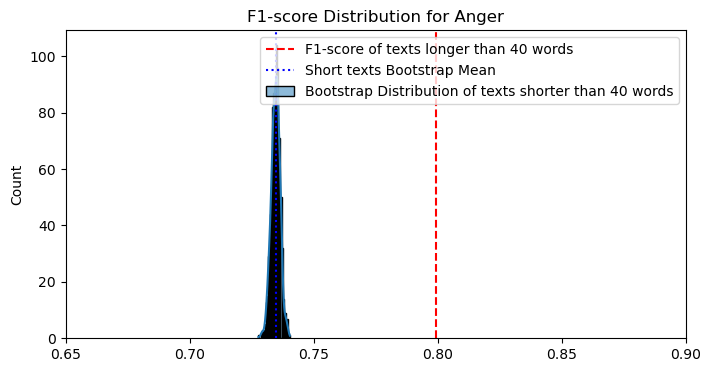

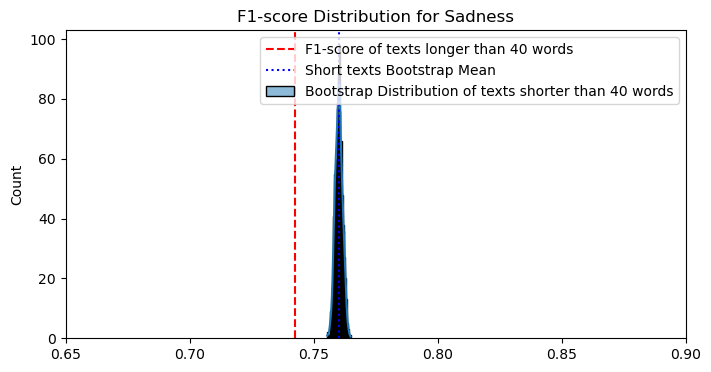

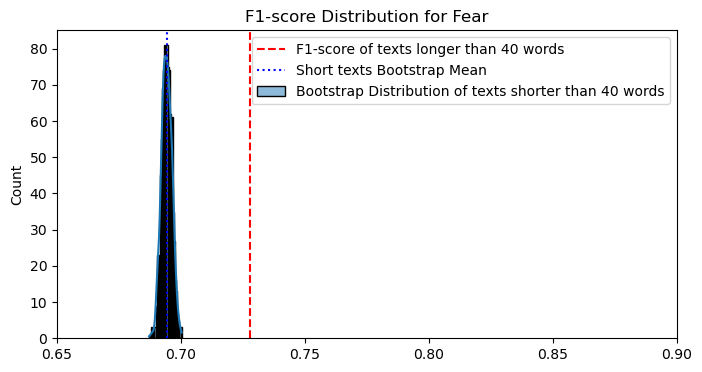

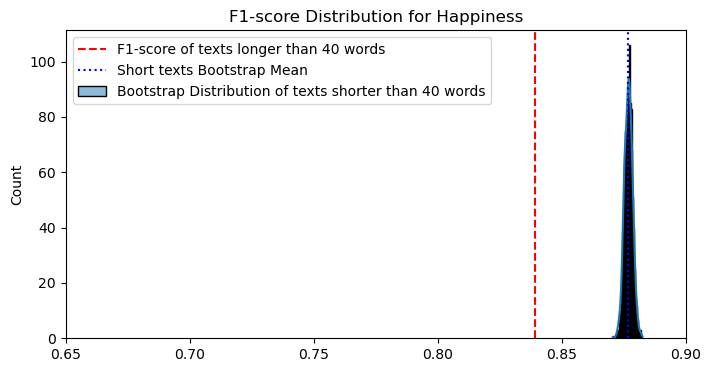

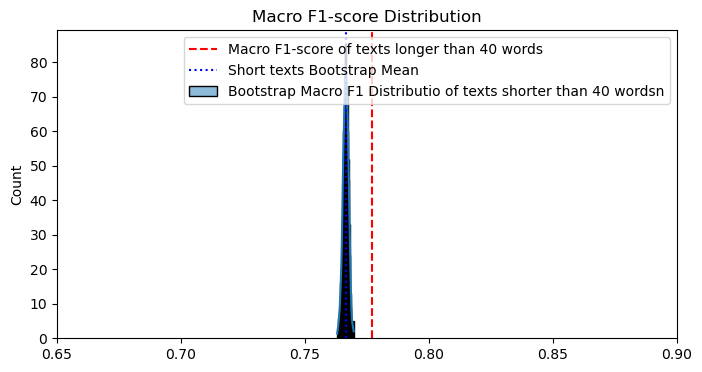

In [167]:

for emotion in emotions:
    plt.figure(figsize=(8, 4))
    sns.histplot(f1_scores_per_emotion_wo_affection[emotion], kde=True, bins=30, label="Bootstrap Distribution of texts shorter than 40 words")
    
    plt.axvline(long_leia_per_emot_wo_affection.loc[emotion, 'f1_score'], color='red', linestyle='dashed', label="F1-score of texts longer than 40 words")
    plt.axvline(np.mean(f1_scores_per_emotion_wo_affection[emotion]), color='blue', linestyle='dotted', label="Short texts Bootstrap Mean")
    plt.xlim(0.65, 0.9) # Fix the x-axis range

    plt.title(f"F1-score Distribution for {emotion}")
    plt.legend()
    plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(macro_f1_scores_wo_affection, kde=True, bins=30, label="Bootstrap Macro F1 Distributio of texts shorter than 40 wordsn")

plt.axvline(longleia_macro_f1_wo_affection, color='red', linestyle='dashed', label="Macro F1-score of texts longer than 40 words")
plt.axvline(np.mean(macro_f1_scores_wo_affection), color='blue', linestyle='dotted', label="Short texts Bootstrap Mean")
plt.xlim(0.65, 0.9) # Fix the x-axis range

plt.title("Macro F1-score Distribution")
plt.legend()
plt.show()
